# Generates boxplots for pairwise escape profile comparisons for within and between groups

- Data is produced from `escape_compare_sims.ipynb` notebook
- Plots correspond to Figures 3B, 4B, 5B

In [1]:
# Analysis definitions, constants, helper functions
from utils import *

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data of pairwise escape profile comparisons
spike2_data_file = 'SPIKE2_escape_compare_sims.csv'
spike1_data_file = 'SPIKE1_escape_compare_sims.csv'

# Figures directory
figdir = 'figures'
if not os.path.exists(figdir): os.mkdir(figdir)

In [3]:
# Plotting function
def plot_region_boxes(
    sim_data_list,
    label_list,
    color_list,
    marker_list,
    title,
    ymin=0, ymax=0,
    draw=True,
    out=None,
    x1=-1, y1=-1
):
    np.random.seed(25)
    
    linew = 2
    N = len(sim_data_list)
    xvals = [ np.random.normal(i+1, 0.06, size=len(sim_data_list[i])) for i in range(N) ]

    fig = plt.figure(figsize=[8+N,8])
    for x, sim_data, color, marker in zip(xvals, sim_data_list, color_list, marker_list):
        plt.scatter(x, sim_data, color=color, marker=marker, s=100, alpha=0.3, edgecolor='k')

    plt.scatter([],[],s=100,color='k',marker='^',label='vacc. vs vacc.')
    plt.scatter([],[],s=100,color=oi_reddishpurple,marker='D',label='macaques vs macaques',edgecolor='k')
    plt.scatter([],[],s=100,color='k',marker='o',label='conv. vs conv.')
    plt.scatter([],[],s=100,color=oi_skyblue,marker='D',label='humans vs humans',edgecolor='k')
    plt.scatter([],[],s=100,color='k',marker='s',label='vacc. vs conv.')    
    plt.scatter([],[],s=100,color=oi_bluishgreen,marker='D',label='macaques vs humans',edgecolor='k')
    
    if x1>0 and y1>0:
        plt.scatter([x1], [y1], color='r', marker='s', s=100, alpha=1, edgecolor='r')
    
    boxes = plt.boxplot(sim_data_list,
                        labels=label_list,
                        sym='',
                        patch_artist=True,
                        boxprops=dict(linewidth=linew),
                        whiskerprops=dict(linewidth=linew),
                        capprops=dict(linewidth=linew),
                        medianprops=dict(color='k', linewidth=linew, linestyle='--'),
                        )
    for patch in boxes['boxes']:
        patch.set_facecolor((0,0,0,0))
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    if ymin!=ymax:
        plt.ylim(ymin,ymax)
    plt.ylabel('Similarity', fontsize=22, labelpad=10)
    plt.legend(fontsize=16, ncol=3)
    plt.tight_layout()
    
    if out:
        plt.savefig(out)

    if draw:
        plt.show()
    else:
        plt.close(fig)

## Plot SPIKE2 data

In [4]:
batch='SPIKE2'

outdir = f'{figdir}/{batch}'
if not os.path.exists(outdir): os.mkdir(outdir)

sims_df = pd.read_csv(spike2_data_file)
sims_df

,sample_ID_1,group_1,sample_ID_2,group_2,epitope_region,similarity
0,254,vaccinated_human,256,vaccinated_human,CTDN,1.125129
1,254,vaccinated_human,260,vaccinated_human,CTDN,1.079677
2,254,vaccinated_human,262,vaccinated_human,CTDN,1.087283
3,254,vaccinated_human,266,vaccinated_human,CTDN,1.057653
4,254,vaccinated_human,268,vaccinated_human,CTDN,1.178810
...,...,...,...,...,...,...
3670,202,convalescent_macaque,206,convalescent_macaque,SHH,1.472064
3671,202,convalescent_macaque,208,convalescent_macaque,SHH,1.492371
3672,204,convalescent_macaque,206,convalescent_macaque,SHH,1.568540
3673,204,convalescent_macaque,208,convalescent_macaque,SHH,1.530216


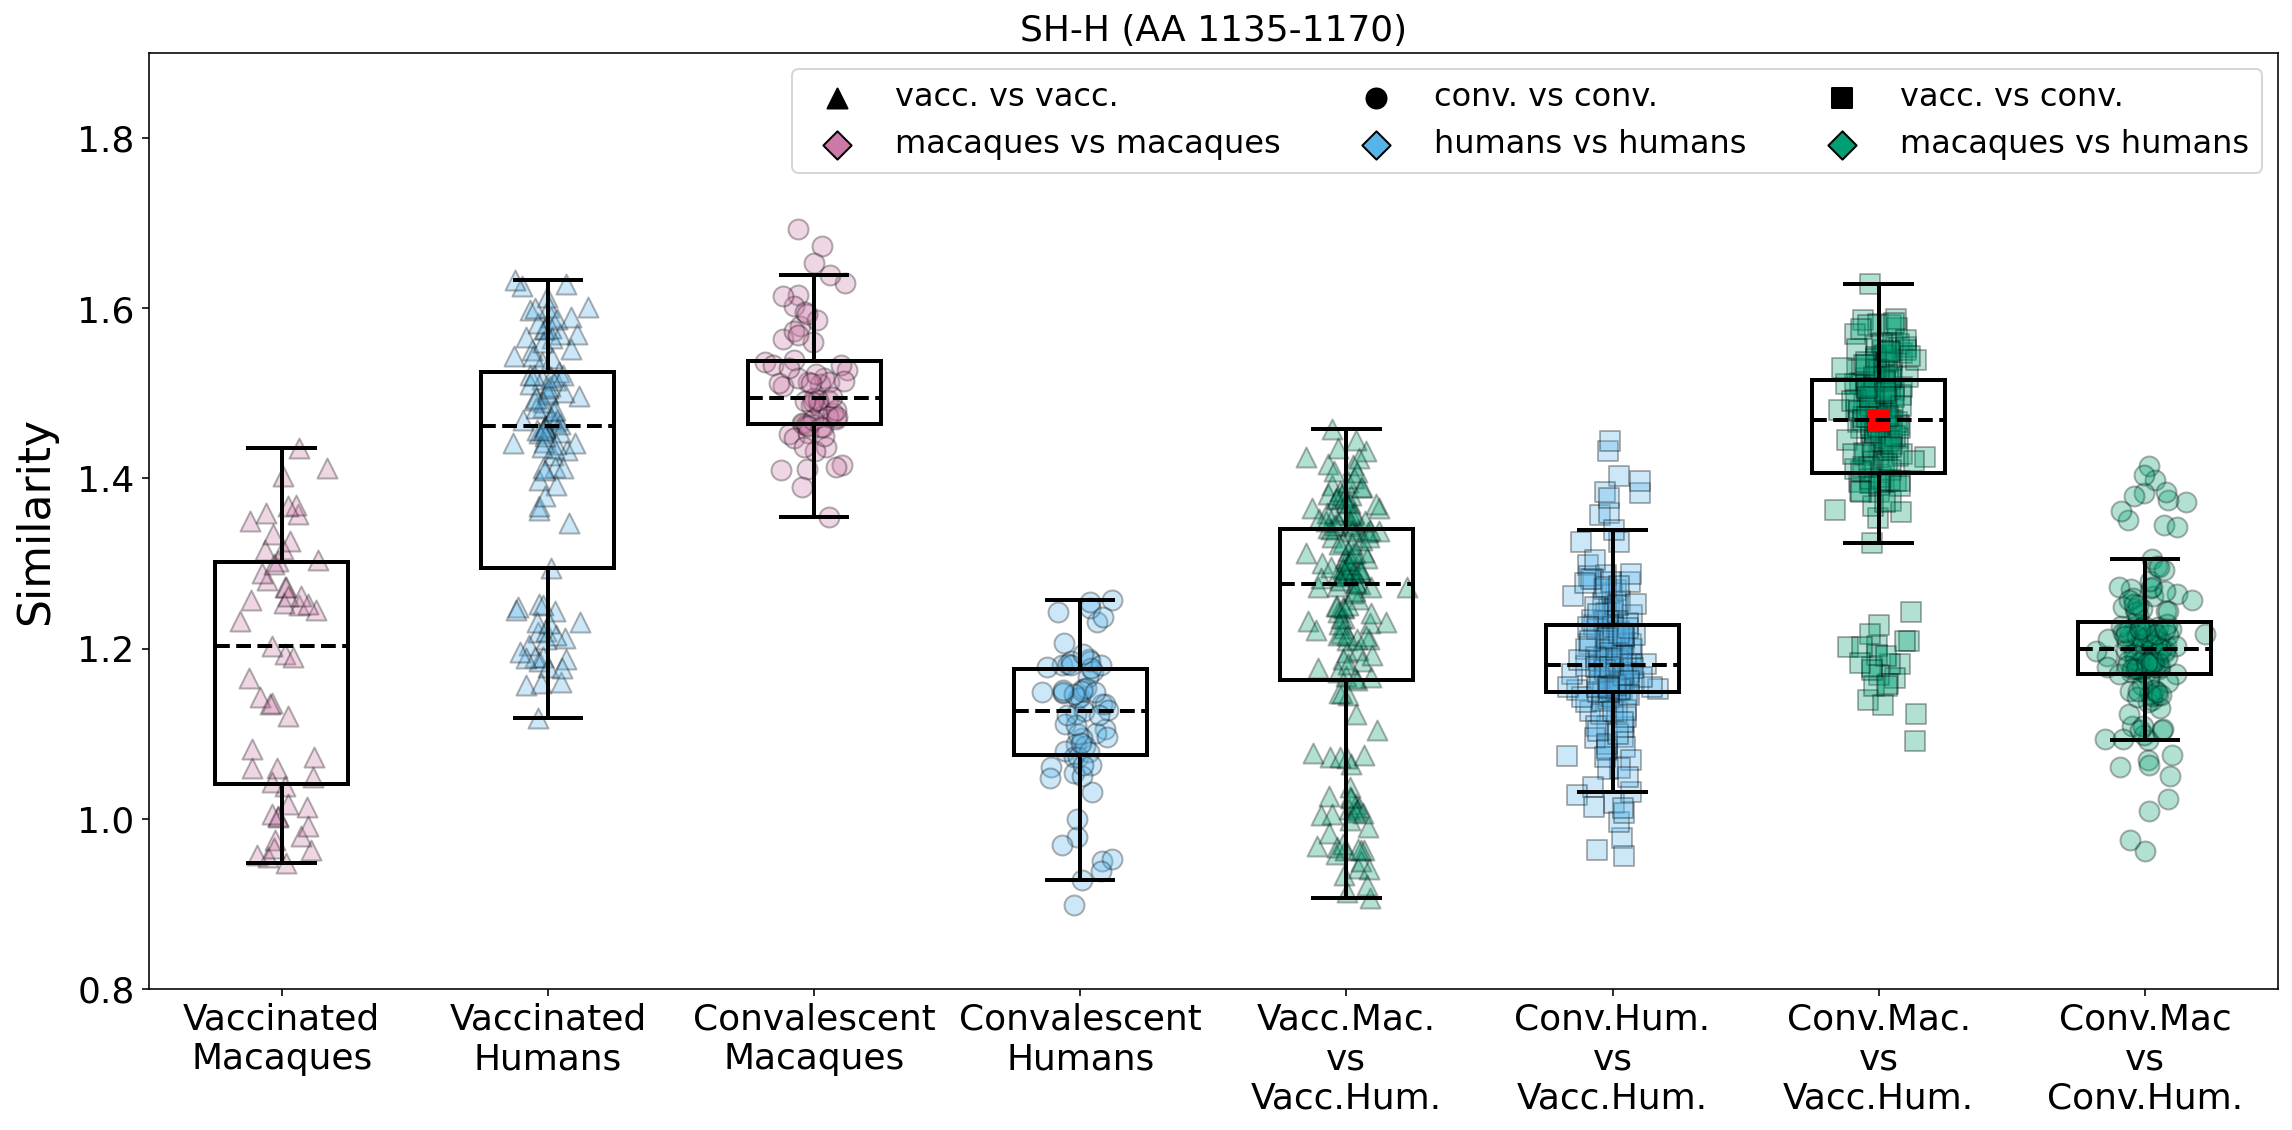

In [5]:
region = 'SHH'

yex = sims_df[(sims_df['epitope_region']=='SHH') 
        & (sims_df['sample_ID_1']==274) 
        & (sims_df['sample_ID_2']==194)
       ]['similarity'].item()

vacc_macaque = sims_df[(sims_df['group_1']=='vaccinated_macaque') 
                          & (sims_df['group_2']=='vaccinated_macaque') 
                          & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

vacc_human = sims_df[(sims_df['group_1']=='vaccinated_human') 
                        & (sims_df['group_2']=='vaccinated_human') 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

conv_macaque = sims_df[(sims_df['group_1']=='convalescent_macaque') 
                          & (sims_df['group_2']=='convalescent_macaque') 
                          & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

conv_human = sims_df[(sims_df['group_1']=='convalescent_human') 
                        & (sims_df['group_2']=='convalescent_human') 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

vm_vs_vh = sims_df[( (sims_df['group_1']=='vaccinated_macaque') | (sims_df['group_2']=='vaccinated_macaque') ) 
                       & ( (sims_df['group_1']=='vaccinated_human') | (sims_df['group_2']=='vaccinated_human') ) 
                       & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

ch_vs_vh = sims_df[ ( (sims_df['group_1']=='vaccinated_human')   | (sims_df['group_2']=='vaccinated_human') ) 
                        & ( (sims_df['group_1']=='convalescent_human') | (sims_df['group_2']=='convalescent_human') ) 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

cm_vs_vh = sims_df[( (sims_df['group_1']=='vaccinated_human') | (sims_df['group_2']=='vaccinated_human') ) 
                            & ( (sims_df['group_1']=='convalescent_macaque') | (sims_df['group_2']=='convalescent_macaque') ) 
                            & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

cm_vs_ch = sims_df[ ( (sims_df['group_1']=='convalescent_macaque') | (sims_df['group_2']=='convalescent_macaque') ) 
                            & ( (sims_df['group_1']=='convalescent_human')   | (sims_df['group_2']=='convalescent_human') ) 
                            & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()


plot_region_boxes(
    [vacc_macaque, vacc_human, conv_macaque, conv_human, vm_vs_vh, ch_vs_vh, cm_vs_vh, cm_vs_ch],
    ['Vaccinated\nMacaques', 'Vaccinated\nHumans', 'Convalescent\nMacaques', 'Convalescent\nHumans',
     'Vacc.Mac.\nvs\nVacc.Hum.', 'Conv.Hum.\nvs\nVacc.Hum.', 'Conv.Mac.\nvs\nVacc.Hum.', 'Conv.Mac\nvs\nConv.Hum.'],
    [oi_reddishpurple, oi_skyblue, oi_reddishpurple, oi_skyblue,
     oi_bluishgreen, oi_skyblue, oi_bluishgreen, oi_bluishgreen],
    ['^', '^', 'o', 'o', '^', 's', 's', 'o'],
    f"SH-H (AA 1135-1170)",
    0.8,1.9,
    draw=True,
    out=f"{outdir}/Figure_5B.png",
    x1=7, y1=yex
)

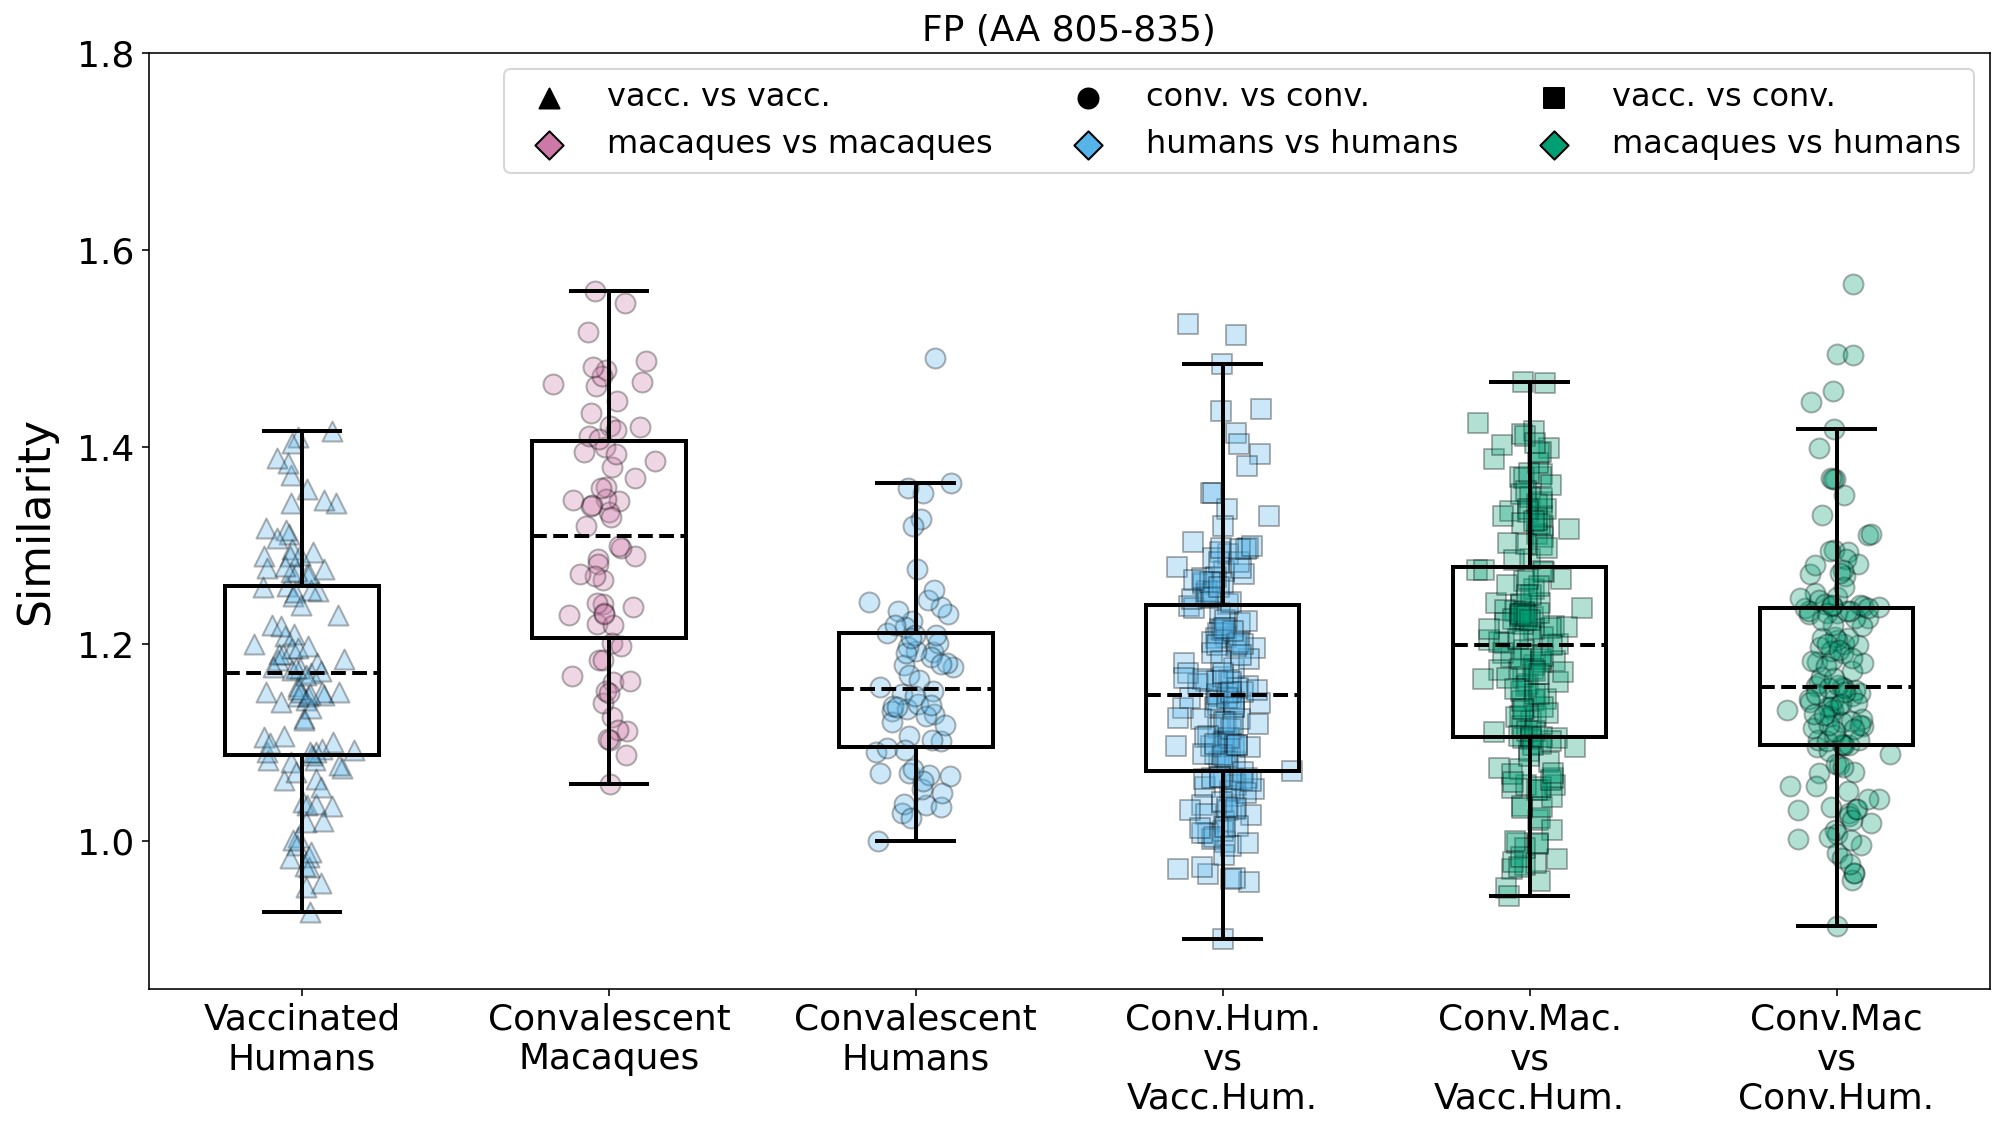

In [6]:
region = 'FP'
vacc_human = sims_df[(sims_df['group_1']=='vaccinated_human') 
                        & (sims_df['group_2']=='vaccinated_human') 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

conv_macaque = sims_df[(sims_df['group_1']=='convalescent_macaque') 
                          & (sims_df['group_2']=='convalescent_macaque') 
                          & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

conv_human = sims_df[(sims_df['group_1']=='convalescent_human') 
                        & (sims_df['group_2']=='convalescent_human') 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

ch_vs_vh = sims_df[ ( (sims_df['group_1']=='vaccinated_human')   | (sims_df['group_2']=='vaccinated_human') ) 
                        & ( (sims_df['group_1']=='convalescent_human') | (sims_df['group_2']=='convalescent_human') ) 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

cm_vs_vh = sims_df[( (sims_df['group_1']=='vaccinated_human') | (sims_df['group_2']=='vaccinated_human') ) 
                            & ( (sims_df['group_1']=='convalescent_macaque') | (sims_df['group_2']=='convalescent_macaque') ) 
                            & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

cm_vs_ch = sims_df[ ( (sims_df['group_1']=='convalescent_macaque') | (sims_df['group_2']=='convalescent_macaque') ) 
                            & ( (sims_df['group_1']=='convalescent_human')   | (sims_df['group_2']=='convalescent_human') ) 
                            & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()


plot_region_boxes(
    [vacc_human, conv_macaque, conv_human, ch_vs_vh, cm_vs_vh, cm_vs_ch],
    ['Vaccinated\nHumans', 'Convalescent\nMacaques', 'Convalescent\nHumans',
     'Conv.Hum.\nvs\nVacc.Hum.', 'Conv.Mac.\nvs\nVacc.Hum.', 'Conv.Mac\nvs\nConv.Hum.'],
    [oi_skyblue, oi_reddishpurple, oi_skyblue,
     oi_skyblue, oi_bluishgreen, oi_bluishgreen],
    ['^', 'o', 'o', 's', 's', 'o'],
    f"FP (AA 805-835)",
    0.85,1.8,
    draw=True,
    out=f"{outdir}/Figure_4B.png"
)

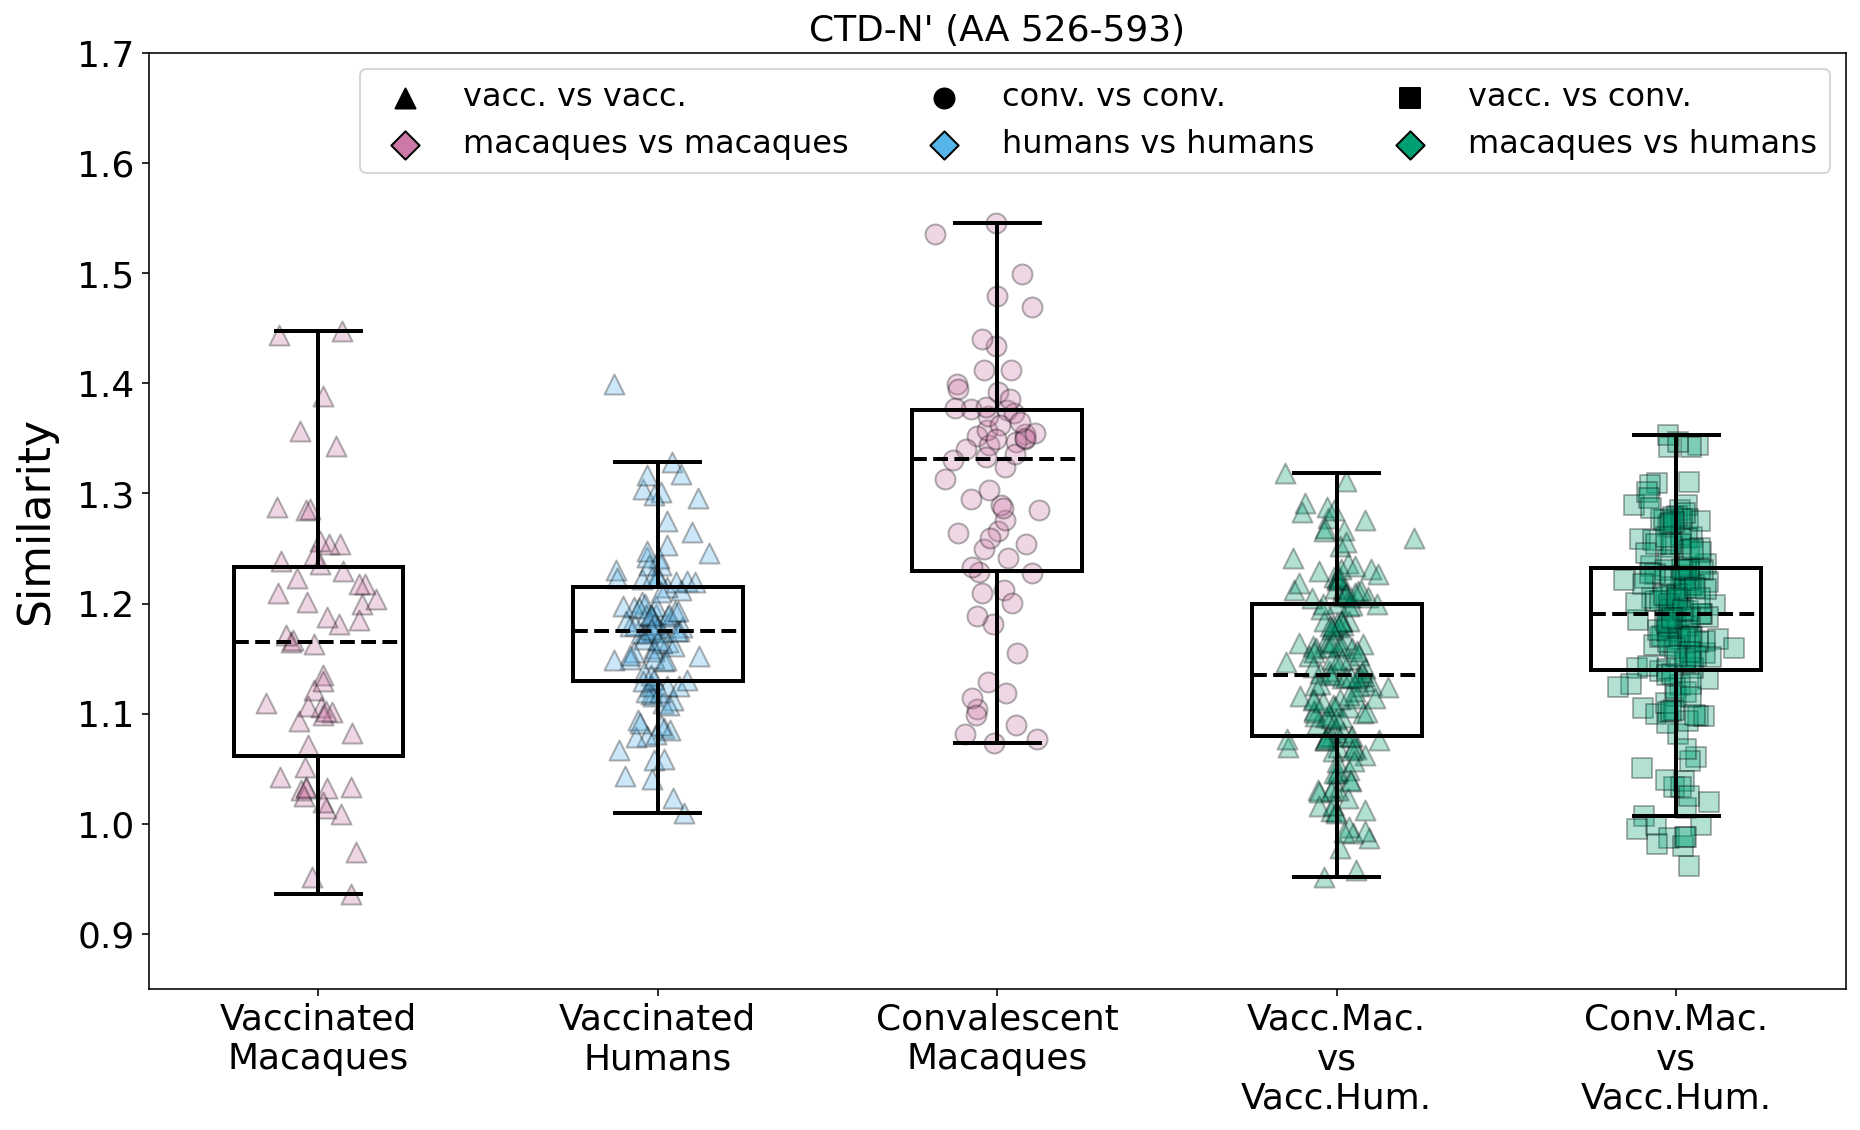

In [7]:
region = 'CTDN'
vacc_macaque = sims_df[(sims_df['group_1']=='vaccinated_macaque') 
                          & (sims_df['group_2']=='vaccinated_macaque') 
                          & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

vacc_human = sims_df[(sims_df['group_1']=='vaccinated_human') 
                        & (sims_df['group_2']=='vaccinated_human') 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

conv_macaque = sims_df[(sims_df['group_1']=='convalescent_macaque') 
                          & (sims_df['group_2']=='convalescent_macaque') 
                          & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

vm_vs_vh = sims_df[( (sims_df['group_1']=='vaccinated_macaque') | (sims_df['group_2']=='vaccinated_macaque') ) 
                       & ( (sims_df['group_1']=='vaccinated_human') | (sims_df['group_2']=='vaccinated_human') ) 
                       & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

ch_vs_vh = sims_df[ ( (sims_df['group_1']=='vaccinated_human')   | (sims_df['group_2']=='vaccinated_human') ) 
                        & ( (sims_df['group_1']=='convalescent_human') | (sims_df['group_2']=='convalescent_human') ) 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

cm_vs_vh = sims_df[( (sims_df['group_1']=='vaccinated_human') | (sims_df['group_2']=='vaccinated_human') ) 
                            & ( (sims_df['group_1']=='convalescent_macaque') | (sims_df['group_2']=='convalescent_macaque') ) 
                            & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()


plot_region_boxes(
    [vacc_macaque, vacc_human, conv_macaque, vm_vs_vh, cm_vs_vh],
    ['Vaccinated\nMacaques', 'Vaccinated\nHumans', 'Convalescent\nMacaques',
     'Vacc.Mac.\nvs\nVacc.Hum.', 'Conv.Mac.\nvs\nVacc.Hum.'],
    [oi_reddishpurple, oi_skyblue, oi_reddishpurple,
     oi_bluishgreen, oi_bluishgreen],
    ['^', '^', 'o', '^', 's'],
    f"CTD-N' (AA 526-593)",
    0.85,1.7,
    draw=True,
    out=f"{outdir}/Figure_3B.png"
)

## Plot SPIKE1 data

In [8]:
batch='SPIKE1'

outdir = f'{figdir}/{batch}'
if not os.path.exists(outdir): os.mkdir(outdir)

sims_df = pd.read_csv(spike1_data_file)
sims_df

,sample_ID_1,group_1,sample_ID_2,group_2,epitope_region,similarity
0,254,vaccinated_human,256,vaccinated_human,CTDN,1.086431
1,254,vaccinated_human,260,vaccinated_human,CTDN,0.991698
2,254,vaccinated_human,262,vaccinated_human,CTDN,1.083203
3,254,vaccinated_human,266,vaccinated_human,CTDN,1.042903
4,254,vaccinated_human,268,vaccinated_human,CTDN,1.098359
...,...,...,...,...,...,...
3670,202,convalescent_macaque,206,convalescent_macaque,SHH,1.251742
3671,202,convalescent_macaque,208,convalescent_macaque,SHH,1.284879
3672,204,convalescent_macaque,206,convalescent_macaque,SHH,1.517530
3673,204,convalescent_macaque,208,convalescent_macaque,SHH,1.578037


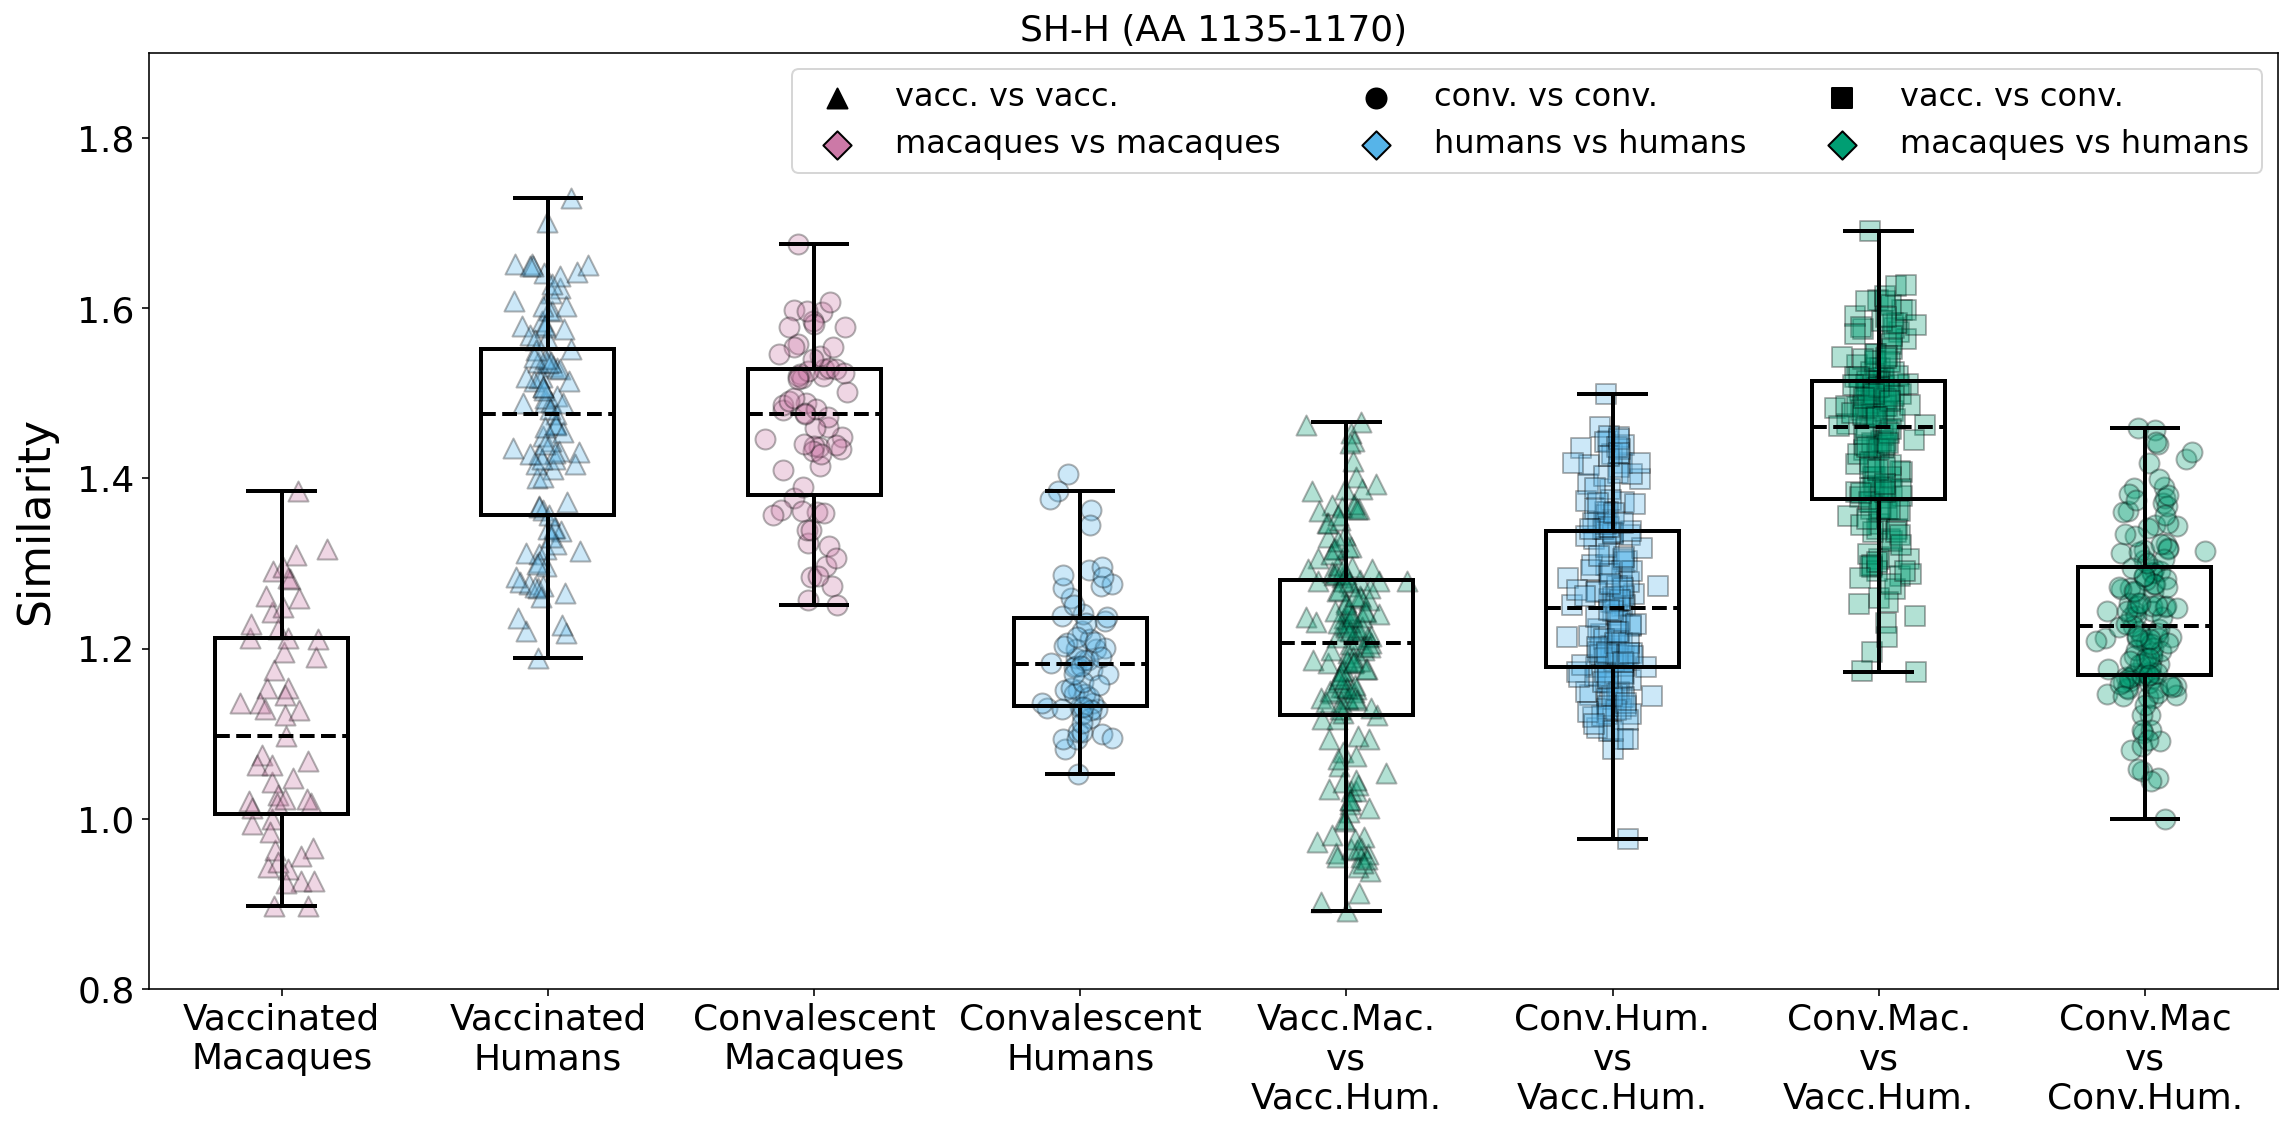

In [9]:
region = 'SHH'
vacc_macaque = sims_df[(sims_df['group_1']=='vaccinated_macaque') 
                          & (sims_df['group_2']=='vaccinated_macaque') 
                          & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

vacc_human = sims_df[(sims_df['group_1']=='vaccinated_human') 
                        & (sims_df['group_2']=='vaccinated_human') 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

conv_macaque = sims_df[(sims_df['group_1']=='convalescent_macaque') 
                          & (sims_df['group_2']=='convalescent_macaque') 
                          & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

conv_human = sims_df[(sims_df['group_1']=='convalescent_human') 
                        & (sims_df['group_2']=='convalescent_human') 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

vm_vs_vh = sims_df[( (sims_df['group_1']=='vaccinated_macaque') | (sims_df['group_2']=='vaccinated_macaque') ) 
                       & ( (sims_df['group_1']=='vaccinated_human') | (sims_df['group_2']=='vaccinated_human') ) 
                       & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

ch_vs_vh = sims_df[ ( (sims_df['group_1']=='vaccinated_human')   | (sims_df['group_2']=='vaccinated_human') ) 
                        & ( (sims_df['group_1']=='convalescent_human') | (sims_df['group_2']=='convalescent_human') ) 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

cm_vs_vh = sims_df[( (sims_df['group_1']=='vaccinated_human') | (sims_df['group_2']=='vaccinated_human') ) 
                            & ( (sims_df['group_1']=='convalescent_macaque') | (sims_df['group_2']=='convalescent_macaque') ) 
                            & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

cm_vs_ch = sims_df[ ( (sims_df['group_1']=='convalescent_macaque') | (sims_df['group_2']=='convalescent_macaque') ) 
                            & ( (sims_df['group_1']=='convalescent_human')   | (sims_df['group_2']=='convalescent_human') ) 
                            & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()


plot_region_boxes(
    [vacc_macaque, vacc_human, conv_macaque, conv_human, vm_vs_vh, ch_vs_vh, cm_vs_vh, cm_vs_ch],
    ['Vaccinated\nMacaques', 'Vaccinated\nHumans', 'Convalescent\nMacaques', 'Convalescent\nHumans',
     'Vacc.Mac.\nvs\nVacc.Hum.', 'Conv.Hum.\nvs\nVacc.Hum.', 'Conv.Mac.\nvs\nVacc.Hum.', 'Conv.Mac\nvs\nConv.Hum.'],
    [oi_reddishpurple, oi_skyblue, oi_reddishpurple, oi_skyblue,
     oi_bluishgreen, oi_skyblue, oi_bluishgreen, oi_bluishgreen],
    ['^', '^', 'o', 'o', '^', 's', 's', 'o'],
    f"SH-H (AA 1135-1170)",
    0.8,1.9,
    draw=True,
    out=f"{outdir}/Figure_5B.png"
)

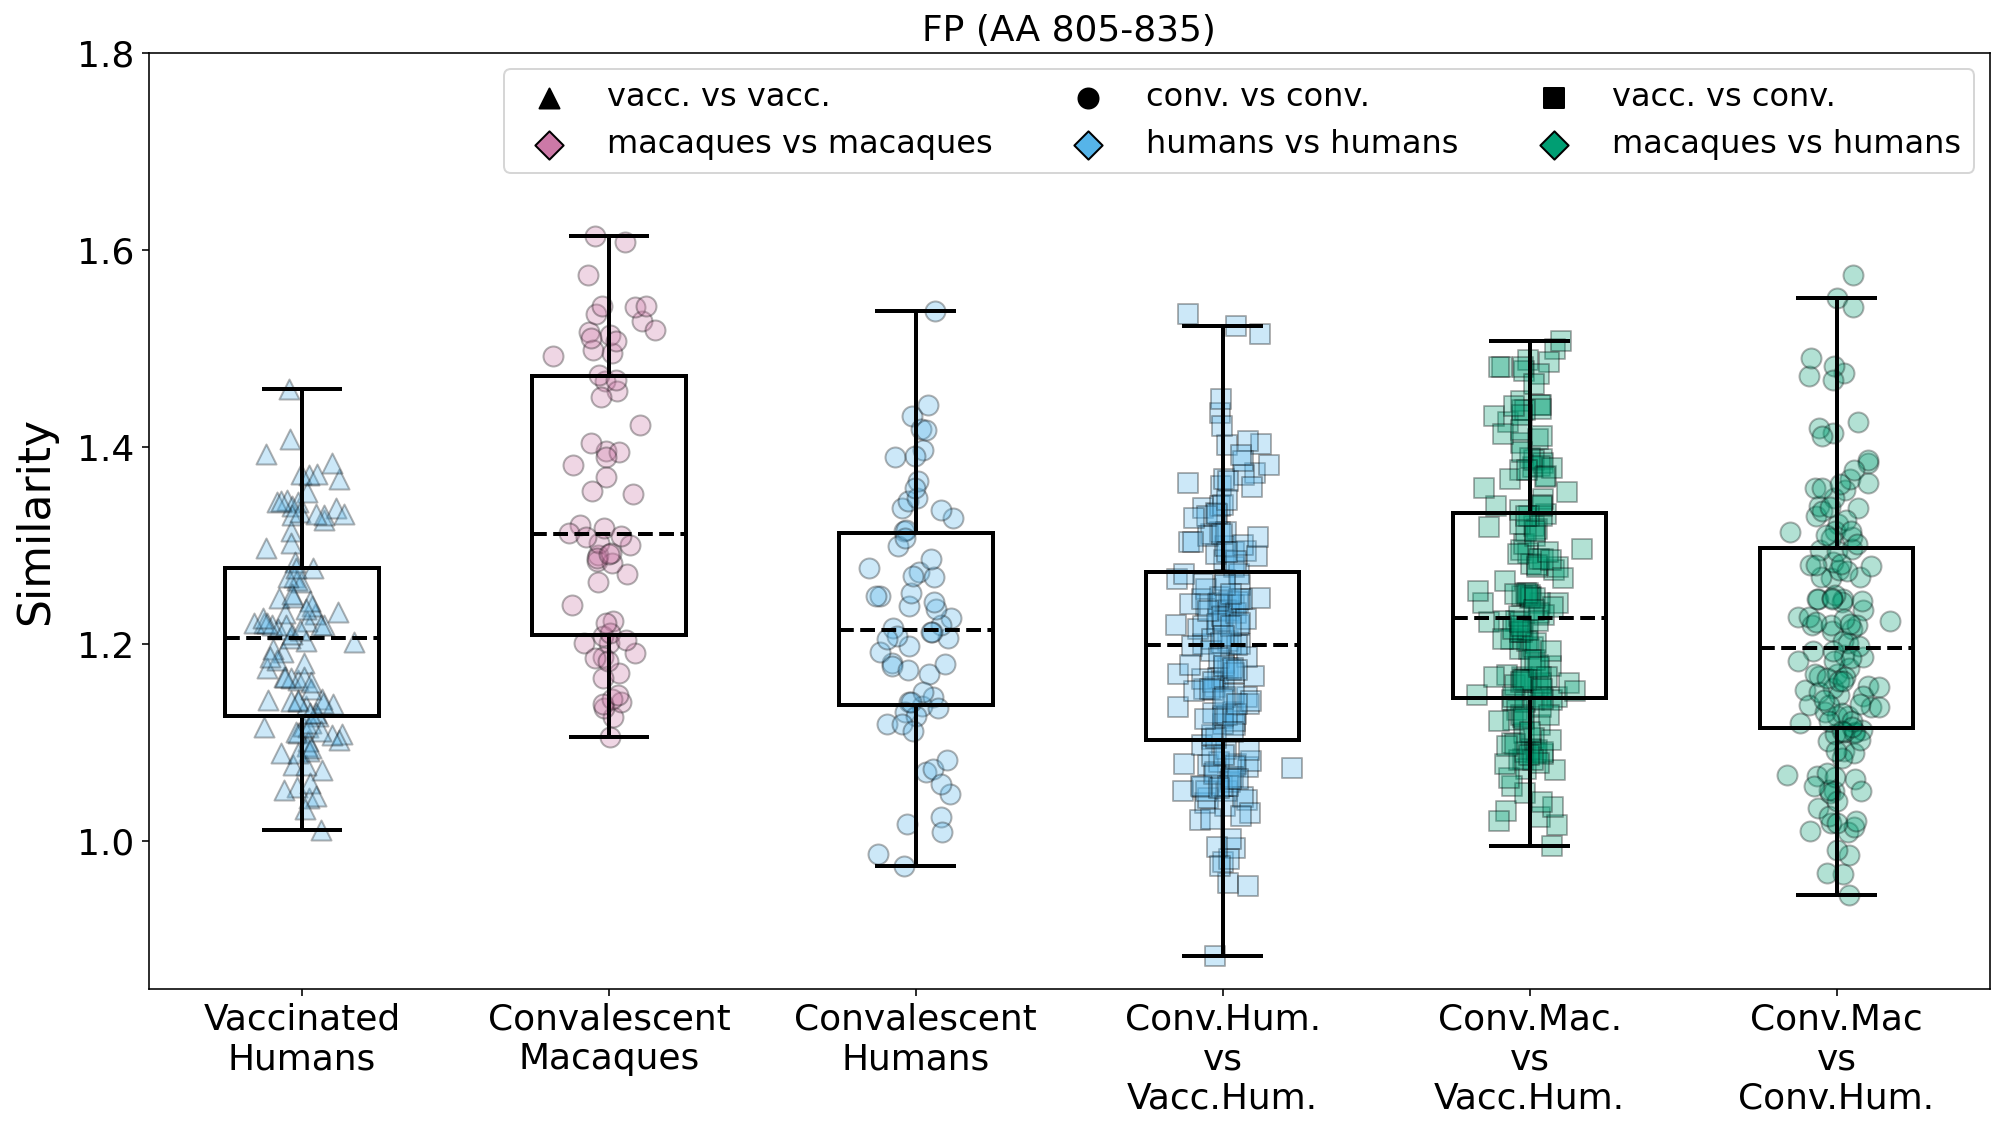

In [10]:
region = 'FP'
vacc_human = sims_df[(sims_df['group_1']=='vaccinated_human') 
                        & (sims_df['group_2']=='vaccinated_human') 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

conv_macaque = sims_df[(sims_df['group_1']=='convalescent_macaque') 
                          & (sims_df['group_2']=='convalescent_macaque') 
                          & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

conv_human = sims_df[(sims_df['group_1']=='convalescent_human') 
                        & (sims_df['group_2']=='convalescent_human') 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

ch_vs_vh = sims_df[ ( (sims_df['group_1']=='vaccinated_human')   | (sims_df['group_2']=='vaccinated_human') ) 
                        & ( (sims_df['group_1']=='convalescent_human') | (sims_df['group_2']=='convalescent_human') ) 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

cm_vs_vh = sims_df[( (sims_df['group_1']=='vaccinated_human') | (sims_df['group_2']=='vaccinated_human') ) 
                            & ( (sims_df['group_1']=='convalescent_macaque') | (sims_df['group_2']=='convalescent_macaque') ) 
                            & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

cm_vs_ch = sims_df[ ( (sims_df['group_1']=='convalescent_macaque') | (sims_df['group_2']=='convalescent_macaque') ) 
                            & ( (sims_df['group_1']=='convalescent_human')   | (sims_df['group_2']=='convalescent_human') ) 
                            & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()


plot_region_boxes(
    [vacc_human, conv_macaque, conv_human, ch_vs_vh, cm_vs_vh, cm_vs_ch],
    ['Vaccinated\nHumans', 'Convalescent\nMacaques', 'Convalescent\nHumans',
     'Conv.Hum.\nvs\nVacc.Hum.', 'Conv.Mac.\nvs\nVacc.Hum.', 'Conv.Mac\nvs\nConv.Hum.'],
    [oi_skyblue, oi_reddishpurple, oi_skyblue,
     oi_skyblue, oi_bluishgreen, oi_bluishgreen],
    ['^', 'o', 'o', 's', 's', 'o'],
    f"FP (AA 805-835)",
    0.85,1.8,
    draw=True,
    out=f"{outdir}/Figure_4B.png"
)

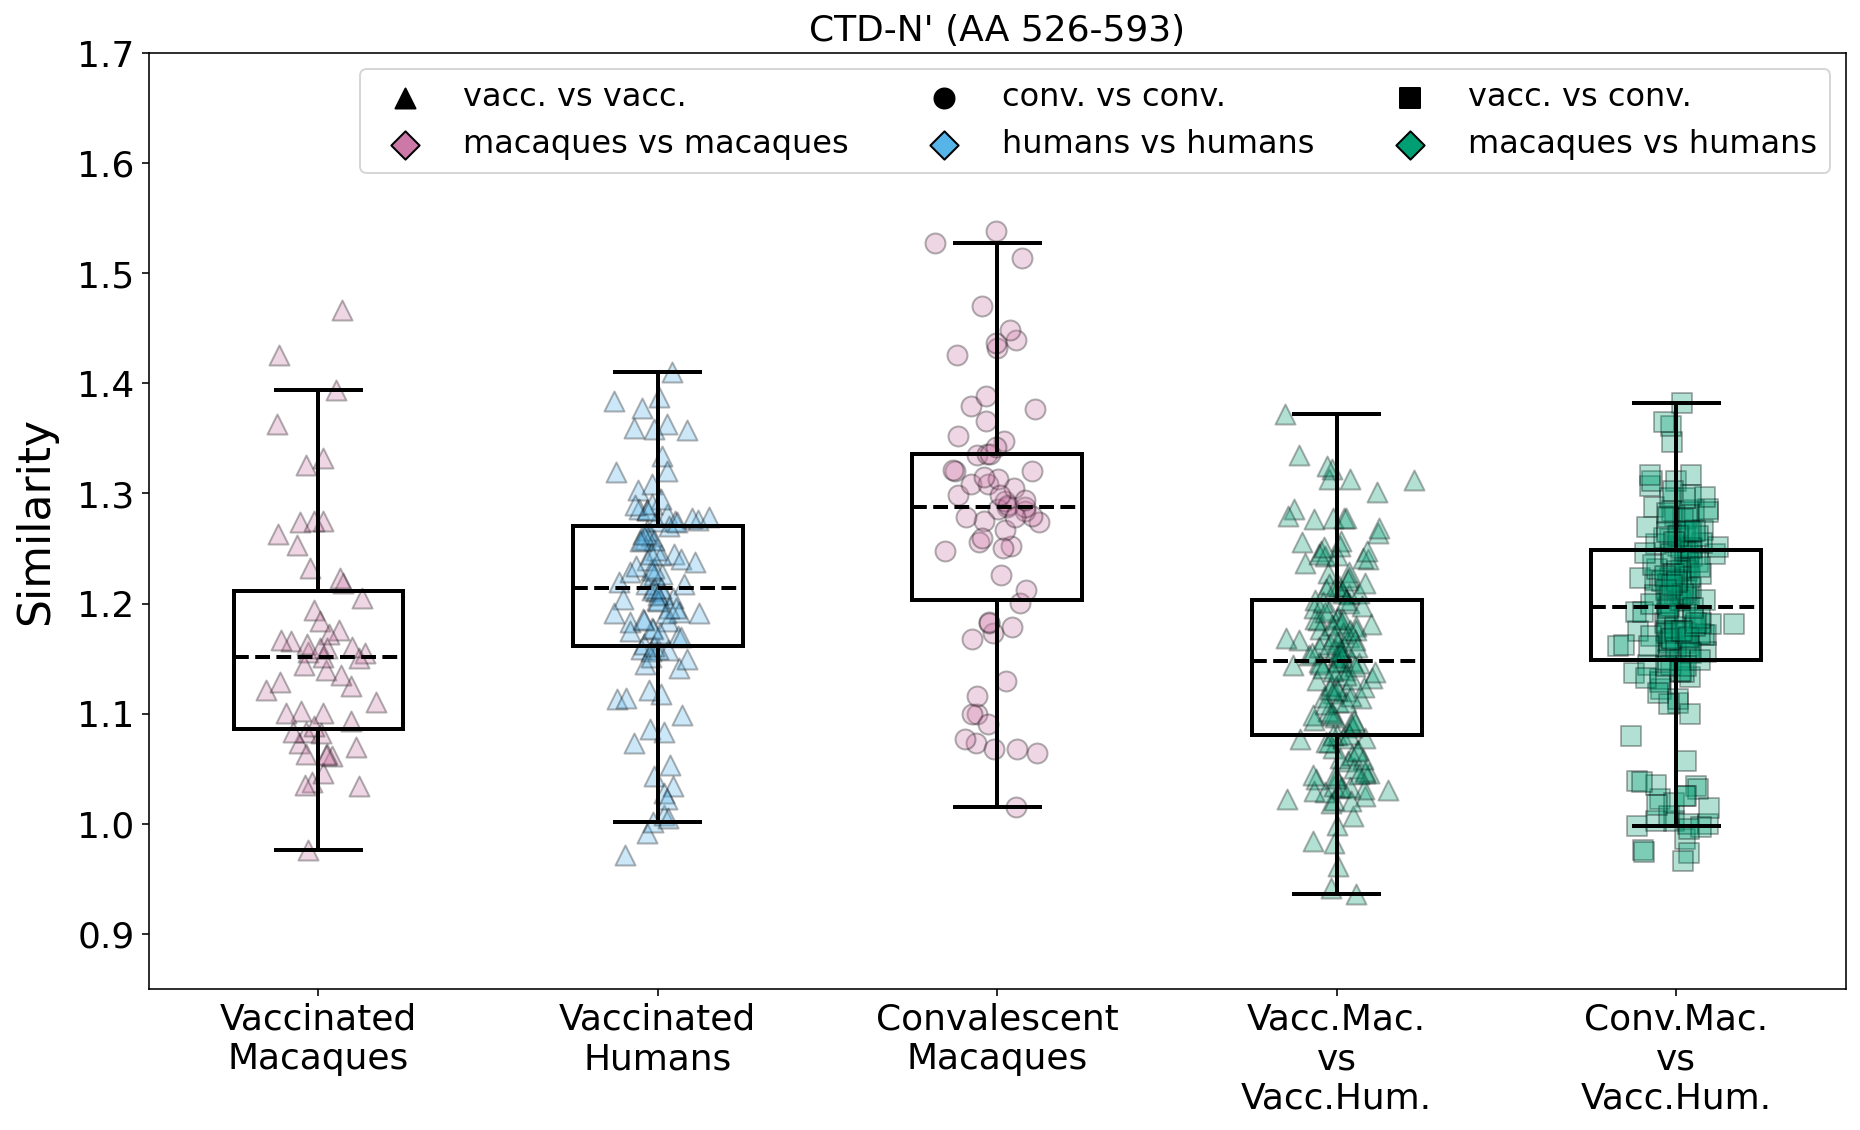

In [11]:
region = 'CTDN'
vacc_macaque = sims_df[(sims_df['group_1']=='vaccinated_macaque') 
                          & (sims_df['group_2']=='vaccinated_macaque') 
                          & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

vacc_human = sims_df[(sims_df['group_1']=='vaccinated_human') 
                        & (sims_df['group_2']=='vaccinated_human') 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

conv_macaque = sims_df[(sims_df['group_1']=='convalescent_macaque') 
                          & (sims_df['group_2']=='convalescent_macaque') 
                          & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

vm_vs_vh = sims_df[( (sims_df['group_1']=='vaccinated_macaque') | (sims_df['group_2']=='vaccinated_macaque') ) 
                       & ( (sims_df['group_1']=='vaccinated_human') | (sims_df['group_2']=='vaccinated_human') ) 
                       & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

ch_vs_vh = sims_df[ ( (sims_df['group_1']=='vaccinated_human')   | (sims_df['group_2']=='vaccinated_human') ) 
                        & ( (sims_df['group_1']=='convalescent_human') | (sims_df['group_2']=='convalescent_human') ) 
                        & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()

cm_vs_vh = sims_df[( (sims_df['group_1']=='vaccinated_human') | (sims_df['group_2']=='vaccinated_human') ) 
                            & ( (sims_df['group_1']=='convalescent_macaque') | (sims_df['group_2']=='convalescent_macaque') ) 
                            & (sims_df['epitope_region']==region)]['similarity'].to_numpy().tolist()


plot_region_boxes(
    [vacc_macaque, vacc_human, conv_macaque, vm_vs_vh, cm_vs_vh],
    ['Vaccinated\nMacaques', 'Vaccinated\nHumans', 'Convalescent\nMacaques',
     'Vacc.Mac.\nvs\nVacc.Hum.', 'Conv.Mac.\nvs\nVacc.Hum.'],
    [oi_reddishpurple, oi_skyblue, oi_reddishpurple,
     oi_bluishgreen, oi_bluishgreen],
    ['^', '^', 'o', '^', 's'],
    f"CTD-N' (AA 526-593)",
    0.85,1.7,
    draw=True,
    out=f"{outdir}/Figure_3B.png"
)